In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('food_order.csv')
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


In [3]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [4]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [5]:
# Look for null values to deal with
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [6]:
any_dup = df.duplicated()
any_dup.sum()

0

In [7]:
df.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [8]:
df.cuisine_type.unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [9]:
df.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

## Cleaning Incorrect Restaurant Names

In [10]:
incorrect_names = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Dirty Bird To Go (archived)', 'CafÌ© China']
correct_names = ['Big Wong Restaurant', 'Empanada Mama', 'Chipotle Mexican Grill', "Joe's Shanghai", 'Dirty Bird To Go', 'Cafe China']

for num, name in enumerate(incorrect_names):
  curr_name = df[df['restaurant_name'] == name].index

  for val in curr_name:
    df.loc[val, 'restaurant_name'] = correct_names[num]

df['restaurant_name'] = df['restaurant_name'].apply(lambda name : name.strip().capitalize())

df['restaurant_name'].unique()

array(['Hangawi', 'Blue ribbon sushi izakaya', 'Cafe habana',
       'Blue ribbon fried chicken', 'Dirty bird to go',
       'Tamarind tribeca', 'The meatball shop', 'Barbounia',
       'Anjappar chettinad', 'Bukhara grill', 'Big wong restaurant',
       'Empanada mama', 'Pylos', "Lucky's famous burgers", 'Shake shack',
       'Sushi of gari', 'Redfarm hudson', 'Blue ribbon sushi',
       'Five guys burgers and fries', 'Tortaria', 'Cafe mogador',
       'Otto enoteca pizzeria', 'Vezzo thin crust pizza',
       'Sushi of gari 46', 'The kati roll company', 'Klong',
       '5 napkin burger', 'Tao', 'Parm', 'Sushi samba',
       'Haru gramercy park', 'Chipotle mexican grill', 'Redfarm broadway',
       'Cafeteria', 'Dumont burger', "Sarabeth's east",
       'Hill country fried chicken', 'Bistango', "Jack's wife freda",
       "Mamoun's falafel", 'Prosperity dumpling',
       'Blue ribbon sushi bar & grill', 'Westville hudson',
       'Blue ribbon brooklyn', 'Nobu next door', 'Osteria morin

In [11]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


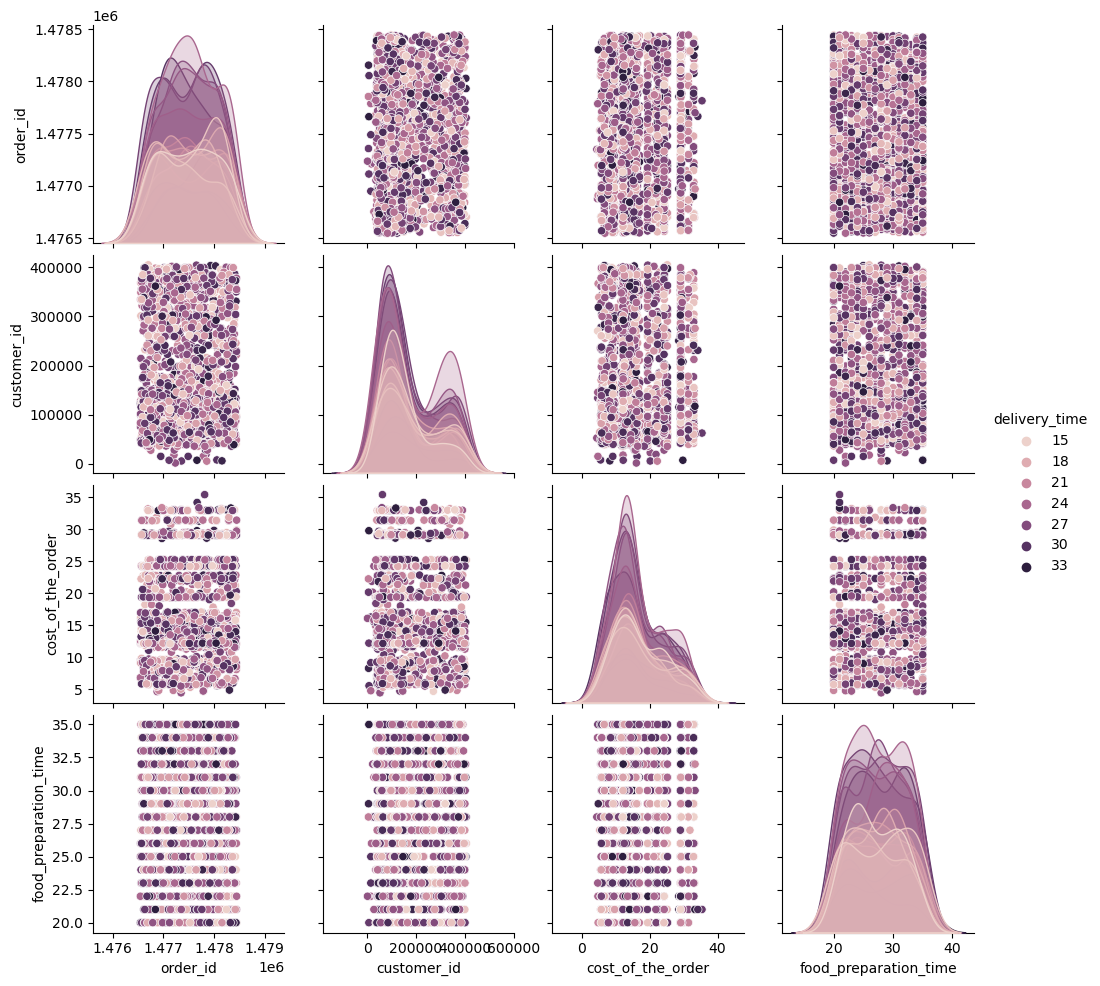

In [12]:
sns.pairplot(df, hue = 'delivery_time');

#sns pairplot to show delivery_time plotted against each variable
# Easy way to look for quick trends and insights

In [13]:
most_expensive_order = df.sort_values('cost_of_the_order', ascending=False).head(1)
most_expensive_order

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


In [14]:
cheapest_order = df.sort_values('cost_of_the_order').head(1)
cheapest_order

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
624,1477349,52327,Nobu next door,Japanese,4.47,Weekend,5,28,26


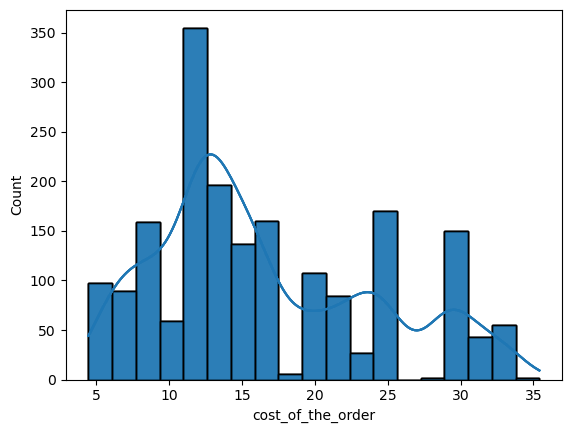

In [28]:
sns.histplot(data=df,x='cost_of_the_order',kde=True)
plt.show()

# the histogram plot below shows the most orders cost between 11-13 dollars

In [16]:
longest_delivery_time = df.sort_values('delivery_time', ascending=False).head(1)
longest_delivery_time

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
989,1477545,144352,Shake shack,American,21.93,Weekday,Not given,21,33


In [17]:
shortest_delivery_time = df.sort_values('delivery_time').head(1)
shortest_delivery_time

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
424,1477066,376381,Shake shack,American,8.25,Weekend,Not given,30,15


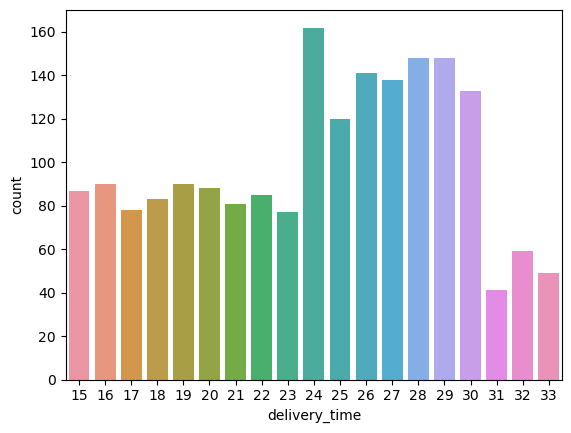

In [29]:
sns.countplot(x='delivery_time', data=df)
plt.show()

# the most orders delivered had a delivery time of 24 minutes
# it takes about 24-30 minutes to deliver food on average

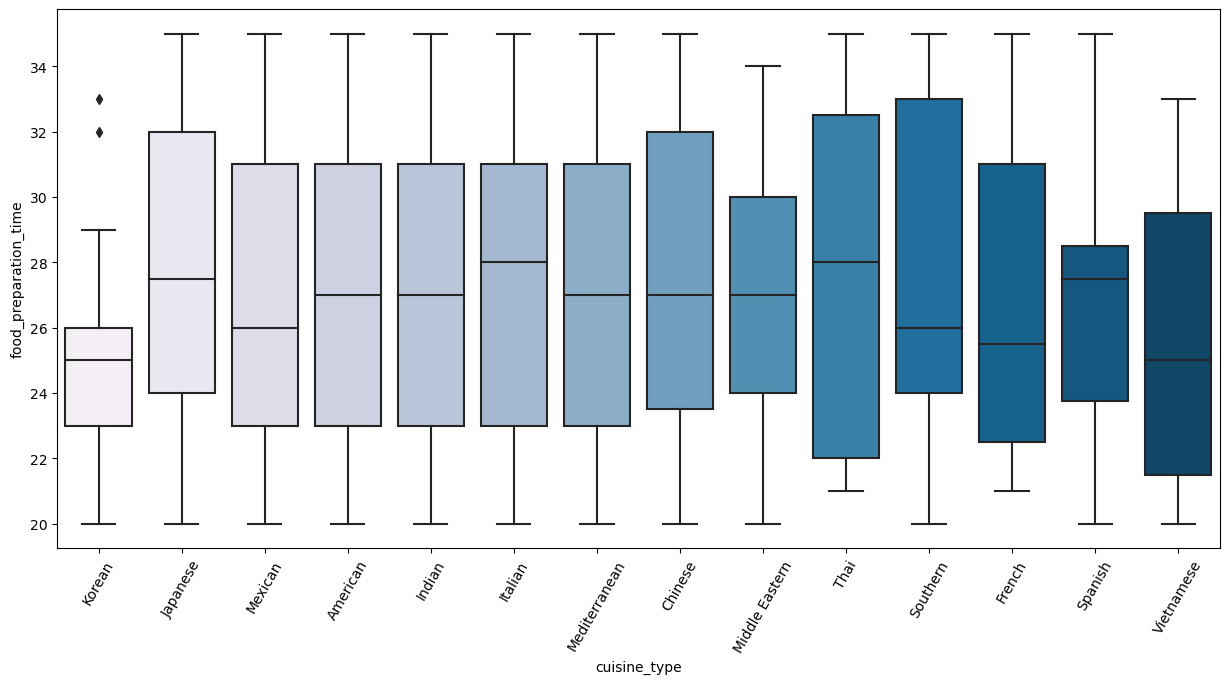

In [19]:
# Relationship between cuisine type and food preparation time
plt.figure(figsize=(15,7))
sns.boxplot(x= "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

# the food prepation time seems to not be much different between the cuisine types
# korean food takes the least time to prepare
# southern and thai food seems to take the longest to prepare

## Data by Restaurant

In [27]:
popular_restaurants = df
# errors="coerce" will turn 'Not give' into NaN
popular_restaurants['rating'] = pd.to_numeric(popular_restaurants['rating'], errors='coerce')
popular_restaurants = popular_restaurants.groupby('restaurant_name')[['restaurant_name', 'cost_of_the_order', 'rating']]
popular_restaurants = popular_restaurants.agg({'restaurant_name': 'count', 'cost_of_the_order': 'mean', 'rating': 'mean'})
popular_restaurants = popular_restaurants.rename(columns={'restaurant_name': 'num_orders', 'cost_of_the_order': 'avg_order_cost', 'rating': 'avg_rating'})
popular_restaurants.sort_values('num_orders', ascending=False).head(10)

,num_orders,avg_order_cost,avg_rating
restaurant_name,,,
Shake Shack,219,16.344886,4.278195
The Meatball Shop,132,16.251591,4.511905
Blue Ribbon Sushi,119,15.999580,4.219178
Blue Ribbon Fried Chicken,96,17.315521,4.328125
Parm,68,16.364118,4.128205
RedFarm Broadway,59,16.358136,4.243902
RedFarm Hudson,55,16.749273,4.176471
TAO,49,17.030612,4.357143
Han Dynasty,46,16.419348,4.434783


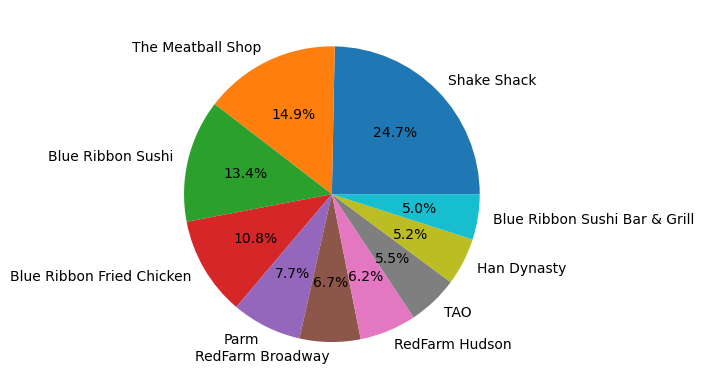

In [ ]:
sorted_restaurants = popular_restaurants.sort_values('num_orders', ascending=False).head(10)
plt.pie(sorted_restaurants['num_orders'], labels=sorted_restaurants.index, autopct='%1.1f%%');

In [ ]:
popular_restaurants.sort_values('avg_rating', ascending=False)[popular_restaurants['num_orders'] > 30].head(10)

/tmp/ipykernel_41608/399299483.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  popular_restaurants.sort_values('avg_rating', ascending=False)[popular_restaurants['num_orders'] > 30].head(10)


,num_orders,avg_order_cost,avg_rating
restaurant_name,,,
Blue Ribbon Sushi Bar & Grill,44,15.150455,4.590909
The Meatball Shop,132,16.251591,4.511905
Han Dynasty,46,16.419348,4.434783
TAO,49,17.030612,4.357143
Nobu Next Door,42,14.849286,4.347826
Blue Ribbon Fried Chicken,96,17.315521,4.328125
Shake Shack,219,16.344886,4.278195
RedFarm Broadway,59,16.358136,4.243902
Sushi of Gari 46,37,17.320811,4.235294


In [ ]:
popular_restaurants.sort_values('avg_order_cost', ascending=False)[popular_restaurants['num_orders'] > 30].head(10)

/tmp/ipykernel_41608/3245148096.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  popular_restaurants.sort_values('avg_order_cost', ascending=False)[popular_restaurants['num_orders'] > 30].head(10)


,num_orders,avg_order_cost,avg_rating
restaurant_name,,,
Rubirosa,37,17.850000,4.125000
Sushi of Gari 46,37,17.320811,4.235294
Blue Ribbon Fried Chicken,96,17.315521,4.328125
TAO,49,17.030612,4.357143
RedFarm Hudson,55,16.749273,4.176471
Han Dynasty,46,16.419348,4.434783
Parm,68,16.364118,4.128205
RedFarm Broadway,59,16.358136,4.243902
Shake Shack,219,16.344886,4.278195


## Total Sales by Restaurant

In [ ]:
sales = df
sales = sales.groupby('restaurant_name')[['cost_of_the_order']].sum().rename(columns={'cost_of_the_order': 'total_sales'})
sales.sort_values('total_sales', ascending=False).head(10)

,total_sales
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


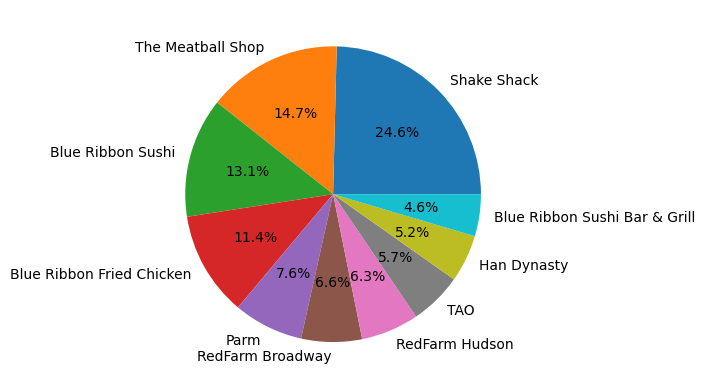

In [ ]:
sorted_sales = sales.sort_values('total_sales', ascending=False).head(10)
plt.pie(sorted_sales['total_sales'], labels=sorted_sales.index, autopct='%1.1f%%');

## Orders By Cuisine Style

In [ ]:
popular_cuisines = df.groupby('cuisine_type')[['restaurant_name']].count().rename(columns={'restaurant_name': 'num_orders'}).sort_values('num_orders', ascending=False)
popular_cuisines

,num_orders
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


In [30]:
import plotly.express as px

grouped_df = df.groupby('cuisine_type').size().reset_index(name='num_orders')
fig = px.pie(grouped_df, values='num_orders', names='cuisine_type', 
             title='Number of Orders by Cuisine Type')

fig.show()

In [32]:
cuisine_restaurant_count = df.groupby(['cuisine_type'])['restaurant_name'].nunique().reset_index(name='restaurant_count')
cuisine_restaurant_count.sort_values('restaurant_count', ascending=False)

,cuisine_type,restaurant_count
0,American,41
4,Italian,31
5,Japanese,29
1,Chinese,16
3,Indian,14
8,Mexican,11
12,Thai,9
9,Middle Eastern,7
6,Korean,5
7,Mediterranean,5


# **Find the average rating and cost base off the cuisine_type**
*    Add a column that combines the food preparation time and devliver time for a total_wait_time
*   How to see which customer order from which restaurant



**What did you learn?**
*   *Spanish has the highest rating*
*   *The avg cost for all cuisine looks to be about $16* 

In [34]:
df['Total_Wait_Time']= df['food_preparation_time'] + df['delivery_time'] 
mean_ratings_and_cost = df.groupby('cuisine_type').agg({'rating': lambda x: round(x.mean(), 2), 'cost_of_the_order': lambda x: round(x.mean(), 2), 'Total_Wait_Time': lambda x: round(x.mean(), 2)})
mean_ratings_and_cost.sort_values(by='rating', ascending=False, inplace=True)
mean_ratings_and_cost

,rating,cost_of_the_order,Total_Wait_Time
cuisine_type,,,
Spanish,4.83,18.99,50.33
Thai,4.67,19.21,50.47
Indian,4.54,16.92,51.19
Mexican,4.42,16.93,51.12
Japanese,4.37,16.30,51.64
Italian,4.36,16.42,52.05
Chinese,4.34,16.31,51.37
Southern,4.31,19.30,51.41
American,4.30,16.32,51.63


## Average Cost By Cuisine Style

In [ ]:
average_cost_by_cuisine = df.groupby(['cuisine_type'])[['cost_of_the_order']].mean().rename(columns={'cost_of_the_order': 'avg_cost_by_cuisine'}).sort_values('avg_cost_by_cuisine')
average_cost_by_cuisine

,avg_cost_by_cuisine
cuisine_type,
Vietnamese,12.882857
Korean,14.001538
Mediterranean,15.474783
Japanese,16.304532
Chinese,16.305209
American,16.319829
Italian,16.418691
Indian,16.919726
Mexican,16.933117


## Delivery Time and Rating

In [ ]:
rating_delivery_time = df
rating_delivery_time = rating_delivery_time.groupby('rating')[['delivery_time']].mean()
rating_delivery_time

,delivery_time
rating,
3.0,24.558511
4.0,23.867876
5.0,24.212585


## Rating Unique Values

In [ ]:
df['rating'].unique()

array([nan,  5.,  3.,  4.])

## Orders on Weekday VS Weekend

In [ ]:
weekday_weekend = df
weekday_weekend = weekday_weekend.groupby('day_of_the_week')[['order_id']].count().rename(columns={'order_id': 'num_orders'})
total = weekday_weekend['num_orders'].sum()
weekday_weekend['num_orders'] = (weekday_weekend / total * 100).round(2)
weekday_weekend = weekday_weekend.rename(columns={'num_orders': 'percentage_orders'})
weekday_weekend


,percentage_orders
day_of_the_week,
Weekday,28.82
Weekend,71.18


## Orders Grouped by Customers

In [ ]:
top_customers = df
top_customers = top_customers.groupby('customer_id').count()[['order_id']].sort_values('order_id', ascending=False)
top_customers = top_customers.rename(columns={'order_id': 'num_orders'})
top_customers.head(10)

,num_orders
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
82041,7
259341,7
276192,7
60052,6


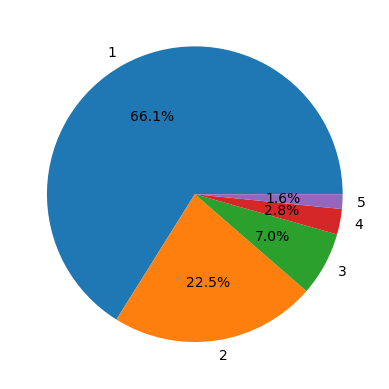

In [ ]:
customer_frequency = top_customers.groupby('num_orders')[['num_orders']].count()
customer_frequency
# Values above 5 are too small
plt.pie(customer_frequency['num_orders'][0:5], labels=customer_frequency.index[0:5], autopct='%1.1f%%');

## Ratings by Customers With Only One Order

In [ ]:
disgruntled_customers = pd.merge(top_customers[top_customers['num_orders'] == 1], df, on='customer_id')
disgruntled_customers = disgruntled_customers.groupby('customer_id')[['rating']].mean()
disgruntled_customers['rating'] = disgruntled_customers['rating'].map(lambda x: 0 if np.isnan(x) else x)
disgruntled_percentages = disgruntled_customers.groupby('rating')[['rating']].count()
disgruntled_percentages.index = ['No Rating', 3, 4, 5]
disgruntled_percentages

,rating
No Rating,297
3,75
4,166
5,246


# **If I was opening up a restaurant, how can I use the data given to ...**

*   what type of restaurant recieves the most orders 
*   when should I staff up the restaurant (weekday or weekend)

*   What are the avg cost,avg total time to get food delivered 
*   List item
